In [208]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F
from torchvision import transforms, utils
from PIL import Image
from model import DeepID

In [240]:
def imshow(ax, img,text=None,should_save=False):
    npimg = img.numpy()
    ax.axis("off")
    if text:
        ax.text(26, 4, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

In [210]:
device = torch.device('cpu')
best_model = DeepID().to(device)
best_model.load_state_dict(torch.load('best_model.pth', map_location='cpu'))
best_model.eval()

DeepID(
  (conv1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (local2d): Conv2dLocal(60, 80, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=360, out_features=160, bias=True)
  (fc2): Linear(in_features=160, out_features=160, bias=True)
  (bn): BatchNorm1d(160, eps

In [211]:
data_transform = transforms.Compose([
    transforms.Resize(best_model.input_size[1:]),
    transforms.Grayscale(),
    transforms.ToTensor()
])


a1 = data_transform(Image.open('./demo_images/Assange1.jpg')).view(1, 1, best_model.input_size[1], best_model.input_size[2])
a2 = data_transform(Image.open('./demo_images/Assange2.jpg')).view(1, 1, best_model.input_size[1], best_model.input_size[2])
t1 = data_transform(Image.open('./demo_images/Taylor1.jpg')).view(1, 1, best_model.input_size[1], best_model.input_size[2])
t2 = data_transform(Image.open('./demo_images/Taylor2.jpg')).view(1, 1, best_model.input_size[1], best_model.input_size[2])

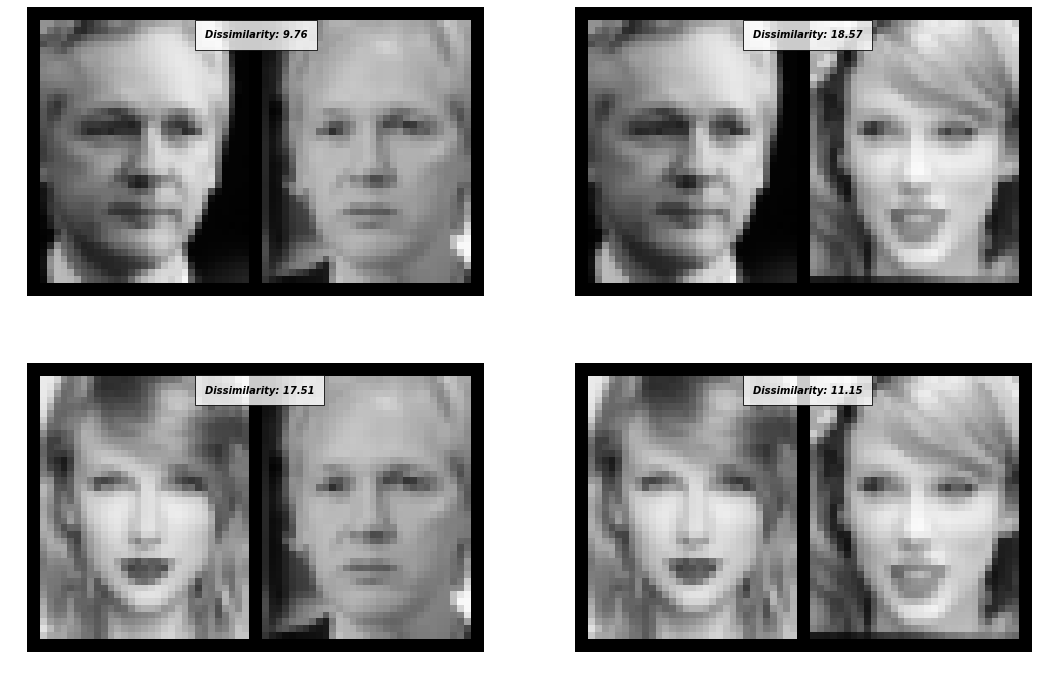

In [241]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

ax = axes.flat[0]
concatenated = torch.cat((a1,a2),0)
output1, output2 = best_model(a1), best_model(a2)
euclidean_distance = F.pairwise_distance(output1, output2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

ax = axes.flat[1]
concatenated = torch.cat((a1,t2),0)
output1, output2 = best_model(a1), best_model(t2)
euclidean_distance = F.pairwise_distance(output1, output2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

ax = axes.flat[2]
concatenated = torch.cat((t1,a2),0)
output1, output2 = best_model(t1), best_model(a2)
euclidean_distance = F.pairwise_distance(output1, output2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

ax = axes.flat[3]
concatenated = torch.cat((t1,t2),0)
output1, output2 = best_model(t1), best_model(t2)
euclidean_distance = F.pairwise_distance(output1, output2)
p = utils.make_grid(concatenated)
imshow(ax, p, 'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

plt.show()